In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('precision',4)
pd.set_option('display.width',120)

titanic_df = pd.read_csv("./data/titanic_train.csv")

del titanic_df['Name']
#del titanic_df['PassengerId']
del titanic_df['Ticket']
del titanic_df['Cabin']
#titanic_df['Embarked_int'] = pd.Series([titanic_df['Embarked']=='S')


numsex = {"male":1 ,"female" :2}
titanic_df['Sex'] = titanic_df['Sex'].replace(numsex)
titanic_df['Sex'] = titanic_df['Sex'].convert_objects(convert_numeric=True)


numembark = {"S":1 ,"C" :2, "Q":3}
titanic_df['Embarked'] = titanic_df['Embarked'].replace(numembark)
titanic_df['Embarked'] = titanic_df['Embarked'].convert_objects(convert_numeric=True)
titanic_df['Embarked'].fillna(1)

titanic_df['Embarked'].fillna(titanic_df['Age'].mean())

titanic_df.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch    Fare  Embarked
0            1         0       3    1   22      1      0   7.250         1
1            2         1       1    2   38      1      0  71.283         2
2            3         1       3    2   26      0      0   7.925         1
3            4         1       1    2   35      1      0  53.100         1
4            5         0       3    1   35      0      0   8.050         1

In [7]:
titanic_df.describe()

PassengerId  Survived   Pclass      Sex      Age    SibSp    Parch     Fare  Embarked
count      891.000   891.000  891.000  891.000  714.000  891.000  891.000  891.000   889.000
mean       446.000     0.384    2.309    1.352   29.699    0.523    0.382   32.204     1.362
std        257.354     0.487    0.836    0.478   14.526    1.103    0.806   49.693     0.636
min          1.000     0.000    1.000    1.000    0.420    0.000    0.000    0.000     1.000
25%        223.500     0.000    2.000    1.000   20.125    0.000    0.000    7.910     1.000
50%        446.000     0.000    3.000    1.000   28.000    0.000    0.000   14.454     1.000
75%        668.500     1.000    3.000    2.000   38.000    1.000    0.000   31.000     2.000
max        891.000     1.000    3.000    2.000   80.000    8.000    6.000  512.329     3.000

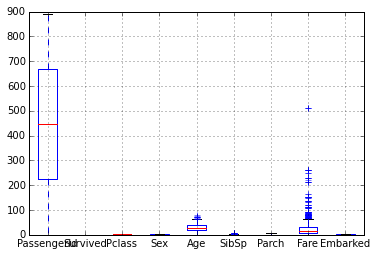

In [8]:
boxplots = titanic_df.boxplot(return_type='axes')

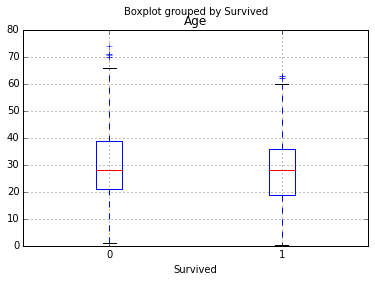

In [9]:
boxplots = titanic_df.boxplot(column='Age',by='Survived',return_type='axes')

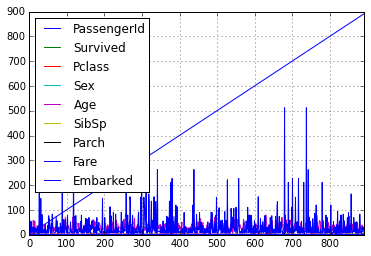

In [10]:
densityplot = titanic_df.plot() #kind='density'

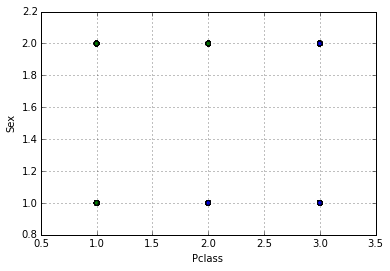

In [11]:
colors_palette = {0:"blue",1: "green"}
groups = list(titanic_df.Survived)
colors = [colors_palette[c] for c in groups]
simple_scatterplot = titanic_df.plot(kind='scatter',x=2,y=3,c=colors)

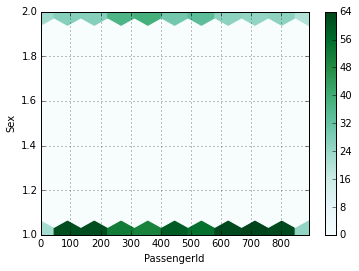

In [12]:
hexbin = titanic_df.plot(kind='hexbin',x=0,y=3,gridsize=10)

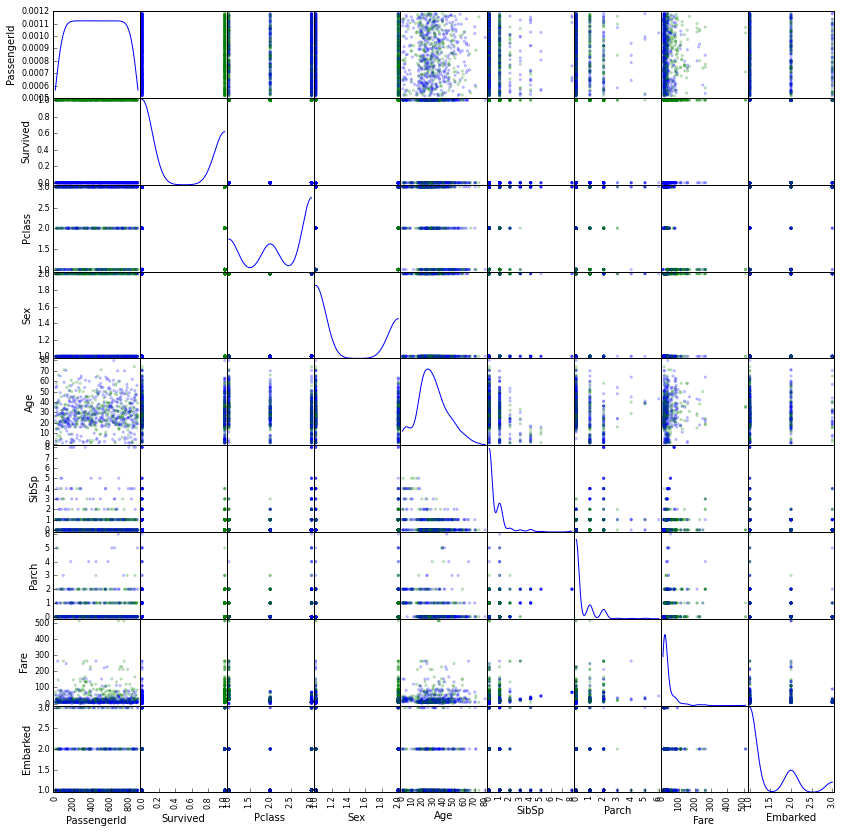

In [13]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0:"blue",1: "green"}
colors = [colors_palette[c] for c in groups]
matrix_of_scatterplots = scatter_matrix(titanic_df,alpha=0.2,figsize=(14,14),color=colors,diagonal='kde')

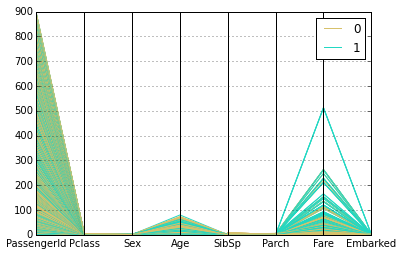

In [14]:
from pandas.tools.plotting import parallel_coordinates
pl1 = parallel_coordinates(titanic_df,'Survived')

In [15]:
missing_perc = titanic_df.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))
sorted_missing_perc = missing_perc.order(ascending=False)
sorted_missing_perc

Age            19.865
Embarked        0.224
Fare            0.000
Parch           0.000
SibSp           0.000
Sex             0.000
Pclass          0.000
Survived        0.000
PassengerId     0.000
dtype: float64

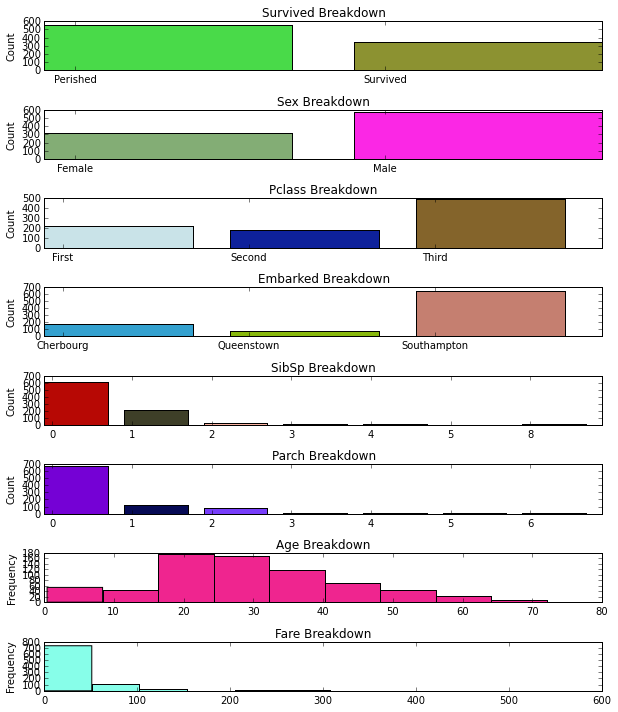

In [16]:
import random
titanic_df = pd.read_csv("./data/titanic_train.csv")

bar_width=0.1
categories_map={'Pclass':{'First':1,'Second':2,'Third':3},
               'Sex':{'Female':'female','Male':'male'},
               "Survived":{'Perished':0,'Survived':1},
               'Embarked':{'Cherbourg':'C','Queenstown':'Q','Southampton':'S'},
               'SibSp':{str(x): x for x in [0,1,2,3,4,5,8]},
               'Parch':{str(x): x for x in range(7)}}
colors = ['red','green','blue','yellow','magenta','orange']
subplots=[111,211,311,411,511,611,711,811]
cIdx=0
fig,ax=plt.subplots(len(subplots),figsize=(10,12))
keyorder=['Survived','Sex','Pclass','Embarked','SibSp','Parch']

for category_key,category_items in sorted(categories_map.items(),key=lambda i:keyorder.index(i[0])): 
    #for 2.7 use categories_map.iteritems()
    num_bars=len(category_items)
    index=np.arange(num_bars)
    idx=0
    for cat_name,cat_val in sorted(category_items.items()):
        ax[cIdx].bar(idx,len(titanic_df[titanic_df[category_key]==cat_val]),label=cat_name,color=np.random.rand(3,1))
        idx+=1
    ax[cIdx].set_title('%s Breakdown'%category_key)
    xlabels=sorted(category_items.keys())
    ax[cIdx].set_xticks(index+bar_width)
    ax[cIdx].set_xticklabels(xlabels)
    ax[cIdx].set_ylabel('Count')
    cIdx +=1
    
for hcat in ['Age','Fare']:
    ax[cIdx].hist(titanic_df[hcat].dropna(),color=np.random.rand(3,1))
    ax[cIdx].set_title('%s Breakdown' %hcat)
    ax[cIdx].set_ylabel('Frequency')
    cIdx+=1
    
fig.subplots_adjust(hspace=0.8)
plt.show()